In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
boston_dataset = load_boston()

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [3]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)[['RM', 'LSTAT','CRIM']]

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RM', ylabel='Density'>

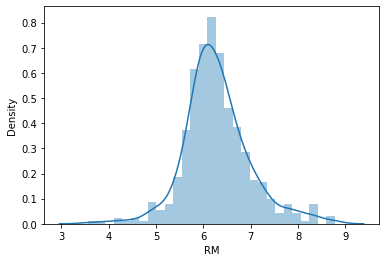

In [4]:
sns.distplot(boston['RM'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM'>

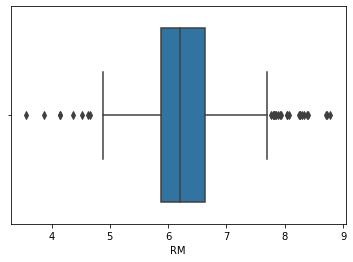

In [5]:
sns.boxplot(boston['RM'])

In [6]:
def find_boundaries(df, variable , distance):
  Q1 = df[variable].quantile(0.25)
  Q3 = df[variable].quantile(0.75)
  IQR = Q3 - Q1
  # IQR stands for Inter Quantile Range
  LB = Q1 - (IQR* distance)
  UB = Q3 + (IQR* distance)
  return LB , UB

In [7]:
RM_LB , RM_UB = find_boundaries(boston , 'RM' , 1.3)

In [8]:
RM_LB , RM_UB

(4.926099999999999, 7.5829)

In [9]:
outliers_RM = np.where(boston['RM'] > RM_UB , True , np.where(boston['RM'] < RM_LB , True , False))

In [10]:
outliers_RM

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
boston['RM'][outliers_RM]

97     8.069
98     7.820
144    4.903
147    4.926
162    7.802
163    8.375
166    7.929
180    7.765
186    7.831
195    7.875
202    7.610
203    7.853
204    8.034
224    8.266
225    8.725
226    8.040
228    7.686
232    8.337
233    8.247
253    8.259
257    8.704
262    8.398
267    8.297
273    7.691
280    7.820
282    7.645
283    7.923
364    8.780
365    3.561
367    3.863
373    4.906
374    4.138
384    4.368
386    4.652
388    4.880
406    4.138
412    4.628
414    4.519
Name: RM, dtype: float64

In [12]:
boston['RM'][outliers_RM].count()

38

In [13]:
boston_trimed_data = boston.loc[~(outliers_RM)]

In [14]:
boston_trimed_data

,RM,LSTAT,CRIM
0,6.575,4.98,0.00632
1,6.421,9.14,0.02731
2,7.185,4.03,0.02729
3,6.998,2.94,0.03237
4,7.147,5.33,0.06905
...,...,...,...
501,6.593,9.67,0.06263
502,6.120,9.08,0.04527
503,6.976,5.64,0.06076
504,6.794,6.48,0.10959


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='RM'>

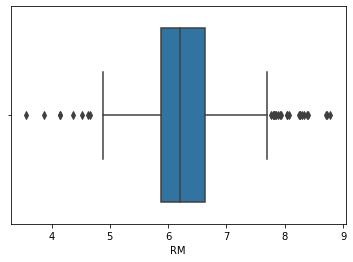

In [15]:
sns.boxplot(boston['RM'])